## P4DS: Assignment 3 (Autumn 2020)

# Data Analysis Project

#### Notebook template design: Brandon Bennett (2020/11/3)

# _2020 US Presidential Election Analysis_


### Project participants:

* A. Student: Callum Macpherson (cn16cm@leeds.ac.uk)
* B. Student: Adam Scott (mm20as@leeds.ac.uk)
* C. Student: Catherine Duffy (gy16cld@leeds.ac.uk)

# Project Plan

## The Data (10 marks)

The Tweet data used in this report was obtained from Kaggle (URL: https://www.kaggle.com/manchunhui/us-election-2020-tweets) and consists of two .csv files, one of Tweets with #DonaldTrump and the other of Tweets containing #JoeBiden, named ‘hashtag_donaldtrump.csv’ and ‘hashtag_joebiden.csv’ respectively.

The data was collected and uploaded by a new Kaggle user, who has a frequently used account over the last 3 months and is rated 89/30,000 for dataset contributions on Kaggle’s ratings. The Tweets were collected using the open source Twitter API using ```statuses_lookup``` and ```snsscrape``` to search for keywords.

The data contains a total of 21 columns including data about the Tweet itself, the user’s account, geodata parsed from the user’s location, and the date and time the Tweet data was mined using the API. The ‘hashtag_donaldtrump.csv’ file contains 958,580 unique Tweets, and the ‘hashtag_joebiden.csv’ file contains 768,423 unique Tweets. Therefore, over 1.5 million Tweets were mined in total using the Twitter API. 

Columns are as follows:
-	```created_at```: Date and time of Tweet creation
-	```tweet_id```: Unique ID of the Tweet
-	```tweet```: Full Tweet text
-	```likes```: Number of likes
-	```retweet_count```: Number of Retweets
-	```source```: Utility used to post Tweet
-	```user_id```: User ID of Tweet creator
-	```user_name```: Username of Tweet creator
-	```user_screen_name```: Screen name of Tweet creator
-	```user_description```: Description of self by Tweet creator
-	```user_join_date```: Join date of Tweet creator
-	```user_followers_count```: Followers count on Tweet creator
-	```user_location```: Location given on Tweet creator's profile
-	```lat```: Latitude parsed from user_location
-	```long```: Longitude parsed from user_location
-	```city```: City parsed from user_location
-	```country```: Country parsed from user_location
-	```state```: State parsed from user_location
-	```state_code```: State code parsed from user_location
-	```collected_at```: Date and time Tweet data was mined from Twitter

Not all of this data will be used in the analysis required to meet our objectives, and any data that is cleaned or dropped will be clearly stated in the Program Code section of this notebook.  

We will also be using final vote count data from the 2020 US presidential election. This data comes from the Associated Press - the AP has been tracking vote counts in US elections since 1848 and their data is widely considered to be accurate. The variables in this dataset are:
- ```state```: State to which the vote count corresponds
- ```state_abr```: Two-letter abbreviation of state name
- ```trump_pct```: Percentage of the vote won by Donald Trump
- ```biden_pct```: Percentage of the vote won by Joe Biden
- ```trump_win```: Binary variable denoting whether Donald Trump won the vote in a state
- ```biden_win```: Binary variable denoting whether Joe Biden won the vote in a state

The final dataset we will be using in this report, exclusively for the third objective, is a shapefile of US state boundaries (including unincorporated territories such as Guam and American Samoa), downloaded from the United States Census Bureau (URL: https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html).

The columns included are:
- ```STATEFP```, ```STATENS```, ```AFFGEOID```, ```GEOID```: Various geographical identification numbers
- ```STUSPS```: Two-letter abbreviation of state name
- ```NAME```: State to which the geographic boundary corresponds
- ```LSAD```: The legal/statistical area description code (all designated 00 at state-level)
- ```ALAND```: Area, in square meters, of land portions of the state
- ```AWATER```: Area, in square meters, of water portions of the state
- ```geometry```: Polygon (or Multi-Polygon) that represents the state boundary

One limitation of the data is that with Tweets, and Twitter data there may be an inherent bias due to the demographics of the users of this platform. This is as the population of Twitter users are younger, more educated and more likely to be democrats than the general population of the USA. As shown in the figure below, a greater proportion of Twitter users identify as ‘Democrat’ than ‘Republican’ and therefore the overall sentiment on Tweets including #DonaldTrump and #JoeBiden is likely to be skewed negative for Trump, and positive for Biden. Acknowledging this, the analysis will be conducted anyway throughout this project, and in the remainder of this notebook. 


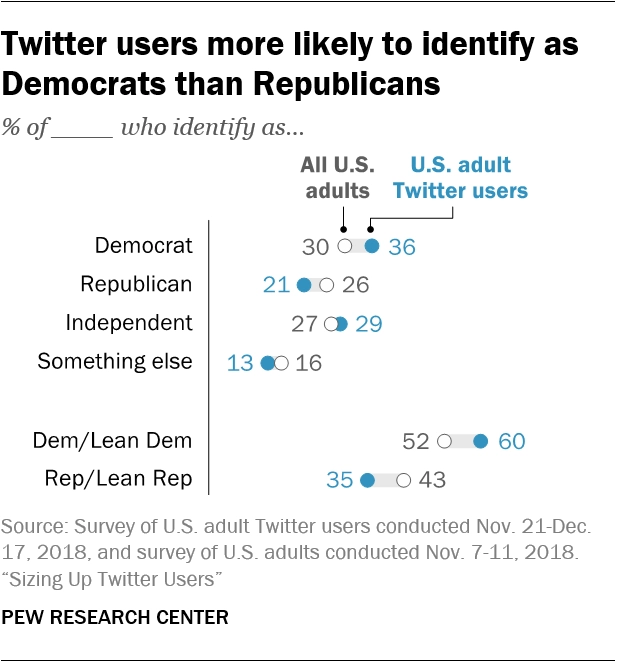


(Source: https://www.pewresearch.org/internet/2019/04/24/sizing-up-twitter-users/)

Another limitation is that ```user_location``` is self-reported, and therefore may not be accurate at the time of the Tweet. As Twitter does not automatically update user locations, Tweets from users that have moved between states without updating their Twitter or misreported their state of residence (which users may choose to do for a number of reasons) could have been summarised under the incorrect state when the location was parsed. This is unlikely to have any major impact on the results of our analysis.

## Project Aim and Objectives (5 marks)

In our project we want to analyse Tweets about Joe Biden and Donald Trump to find out state-level sentiment of each candidate, and then compare this to voting results to find out whether there is a relationship between Twitter sentiment and voting patterns. We then want to display this data on maps. We aim to explore whether data from Twitter could be used to predict the outcome of elections and the limitations of using this dataset. By visualising voting trends and Twitter users' views we hope to gain an insight into the opinions of the US public during the 2020 presidential election and whether these translate into actual votes. We will use sentiment analysis, correlation analysis and other statistical tests to help us reach these conclusions.

### Specific Objective(s)

* __Objective 1:__ _Sentiment Analysis on 2020 Presidential Election Tweets_
* __Objective 2:__ _Analysing Relationships Between Sentiment Analysis and Voting Patterns_
* __Objective 3:__ _Visualising Twitter Sentiment and Voting Patterns Spatially_

## System Design (5 marks)

### Architecture

Rather than running in parallel, our objectives relied on each other's outputs which led to a fairly streamlined architecture. The first objective worked with the Twitter data from Kaggle, which required a considerable amount of filtering and cleaning in order to be useful for our objectives. The US boundary shapefile also required some filtering, although not as much. Functions were defined throughout the program, with their outputs often being used downstream in the program. The Twitter data, which started with over 1 million records, was summarised by state for objectives 2 and 3, as this was more suited to these aims and reduced computational costs. The final outputs were plots and statistical test results, shown in the Project Outcome section of this report.


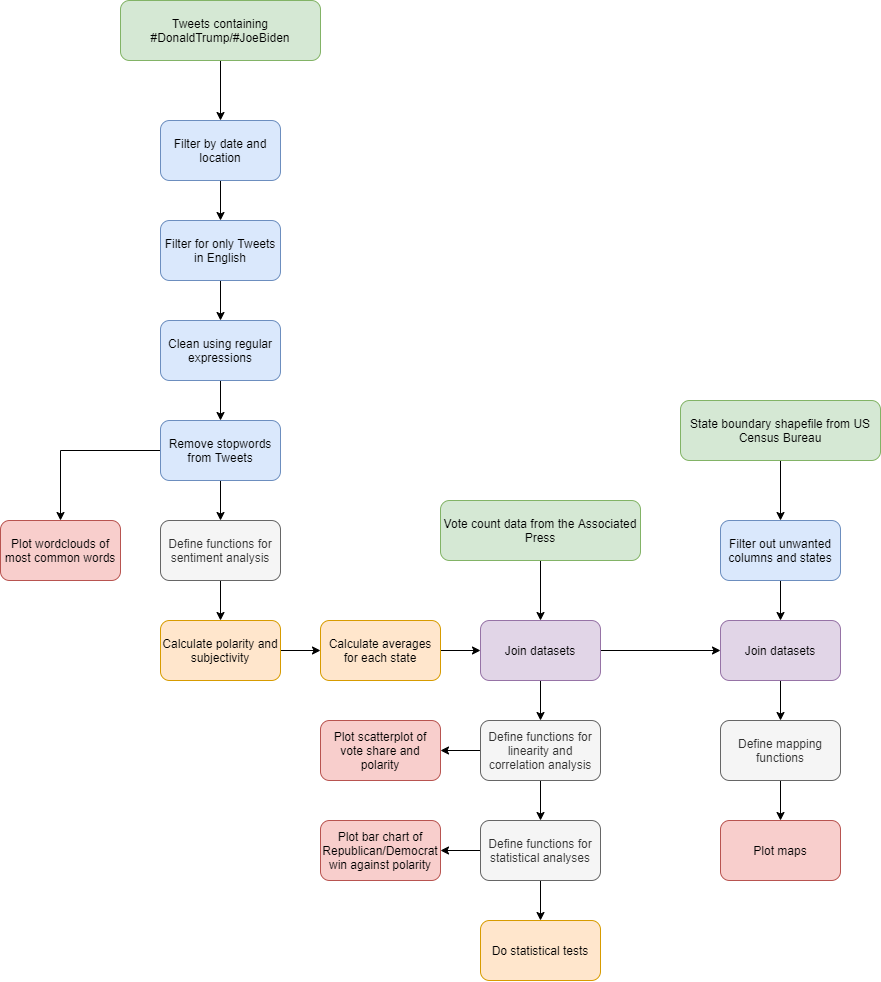
  
  
### Processing Modules and Algorithms

* _cleaning Twitter data through removing Tweets from dates and locations that we weren't interested in, as well as removing non-English Tweets, which cannot be analysed using the ```nltk``` package_
* _conducting sentiment analysis on Tweets containing #DonaldTrump and #JoeBiden in order to ascertain polarity and subjectivity around the time of the US presidential election_
* _combining various datasets, including large .csv files and geographical shapefiles_
* _conducting Shapiro-Wilk, Mann-Whitney U and t-tests_
* _working with pandas and geopandas dataframes to generate choropleth maps_

# Program Code (15 marks)

# Objective 1 - Sentiment Analysis on 2020 Presidential Tweets

In this section I am going to be importing CSV files containing data about Tweets surrounding the 2020 US Presidential Election. Particularly those with "#donaldtrump" and "#joebiden" in the Tweet. The data will be filtered to look at Tweets from the USA, in the English Language, and before the polls closed. The data will then be cleaned and stop words will be removed from all Tweets so that more focus can be given to the words that define the meaning of the Tweet when conducting sentiment analysis. The subjectivity and polarity of each Tweet will be specified, and word clouds plotted to compare and to identify similarities between the two datasets.

## _Preparing the data_
#### _Importing the modules_
_In the following code cell we will import all of the modules that we will use to conduct our analysis for this objective_

In [5]:
#importing libraries
import datetime
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import re

from langdetect import detect
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud

plt.style.use('fivethirtyeight')

#### _Importing and combining the data sets_
_In the following code cell I imported both datasets from the following URL: https://www.kaggle.com/manchunhui/us-election-2020-tweets?select=hashtag_joebiden.csv. There are two CSV files, one containing Tweets with “#donaldtrump” and another with Tweets containing “#joebiden”._

In [6]:
#load the datasets from csv files as pandas dataframes

df_trump = pd.read_csv("hashtag_donaldtrump.csv",lineterminator='\n')
df_biden = pd.read_csv("hashtag_joebiden.csv",lineterminator='\n')

df_trump.head() #to inspect the original dataset

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121


#### _Drop irrelevant columns to this analysis_
_The above output shows a lot of data. All columns irrelevant to any of the 3 objectives for this project will be dropped._

In [7]:
# drop irrelevant columns to this analysis

df_trump = df_trump.drop(columns = ['tweet_id', 'collected_at', 'user_description', 'collected_at'])
df_biden = df_biden.drop(columns = ['tweet_id', 'collected_at', 'user_description', 'collected_at'])

#### _Filter for the USA and remove Tweets after polls close_
_Now that the irrelevant columns have been dropped, we wish to further filter down the data to include only useful entries. Therefore, we are going to filter the Tweets to only show entries from the USA, and then remove any Tweets after the last voting polls had closed._

In [8]:
#Filter for USA
df_trump = df_trump[df_trump['country'] == 'United States of America']
df_biden = df_biden[df_biden['country'] == 'United States of America']

#Need to remove any tweet after November 3, 8:00 p.m. HST 
#as this was last time for polls to close
df_trump = df_trump[df_trump['created_at'] < '2020-11-03 20:00']
df_biden = df_biden[df_biden['created_at'] < '2020-11-03 20:00']


#### _Filter for Tweets in English only_
_Now that all the entries in the dataset are from the USA and before the polls close, the data will be filtered again to only show only Tweets that are Tweeted in English. A function called ```detect_tweetlang``` is written in the code cell below that can be applied to entires in the DataFrames._

In [9]:
#function to detect language 
#as we are only concerned with english for this analysis

def detect_tweetlang(tweet):
    try:
        return detect(tweet)
    except:
        return '0' #for unknown languages
    
df_trump['Language'] = df_trump['tweet'].apply(detect_tweetlang)

In [10]:
#This was put in a seperate cell due to the run time of the function
df_biden['Language'] = df_biden['tweet'].apply(detect_tweetlang)

In [11]:
#Filter dataframe to only show tweets in the English language
df_trump = df_trump[df_trump['Language'] == 'en']
df_biden = df_biden[df_biden['Language'] == 'en']

#### _Clean the dataset_
_In the following code cell the dataset was cleaned. Issues such as "#"s, @mentions, Retweets, hyperlinks and other grammatical issues were addressed. A function called ```cleanText``` is shown in the cell below that has been applied to the DataFrames._

In [12]:
#functions to clean text
def cleanText(text):
    text = text.lower() #Makes all text lower case
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Removing @mentions
    text = re.sub(r'#', '',text)#removing the '#' symbol
    text = re.sub(r'RT[\s]+','',text) #Removing 'RT's for retweets
    text = re.sub(r'https?:\/\/\S+','',text) #Removes the hyperlink
    text = re.sub(r'#.+|https.+|[^(a-zA-Z)\s]','',text) # removing hyperlinks
    return text

#applying functions to tweets
df_trump['tweet'] = df_trump['tweet'].apply(cleanText)
df_biden['tweet'] = df_biden['tweet'].apply(cleanText)


#### _Removing stop words_
_In the following two code cell stop words were removed from the dataset to allow the sentiment analysis to focus on words which define the meaning of the text. Stop words such as 'll' and 'm' are to allow for gramatical contractions to be addressed. Functions called ```removeStopWords``` and ```removeCustomStopWords``` have been defined in the code cell below and is applied to the DataFrames. These functions remove default stopwords from the natural language processing toolkit, and also other words that are likely to dilute the WordClouds and Polarity values. These functions have been applied to the DataFrames below._

In [13]:
#load and remove nltk default stopwords
def removeStopWords(text):
    filtered_text=""
    stopwords = nltk.corpus.stopwords.words('english')
    words=text.split()
    for word in words:
        if word.lower() not in stopwords:
            filtered_text=filtered_text+' '+word
    return filtered_text

df_trump['tweet'] = df_trump['tweet'].apply(removeStopWords)
df_biden['tweet'] = df_biden['tweet'].apply(removeStopWords)

In [14]:
#remove custom stopwords that may crowd the WordCloud
def removeCustomStopWords(text):
    filtered_text=""
    clean_words = []
    stopwords = ["donaldtrump", "trump", "donald","biden", "joe",
                 "joebiden", "amp", "president", "vote", "voting",
                 "election"] #additional stopwords that will not add meaning to WordClouds
    words=text.split()
    for word in words:
        if word.lower() not in stopwords:
            filtered_text=filtered_text+' '+word
            clean_words.append(word)
    return filtered_text


df_trump['tweet'] = df_trump['tweet'].apply(removeCustomStopWords)
df_biden['tweet'] = df_biden['tweet'].apply(removeCustomStopWords)


#### _Sentiment Analysis_
_In the following code cell we will create functions to allow the subjectivity and polarity to be computed called ```getSubjectivity``` and ```getPolarity``` respectively. Subjectivity is how much the Tweet is influenced by emotions or opinions, and polarity is how positive or negative the Tweet is. A function has also been added called ```getAnalysis``` to state if a Tweet is postive, netural or positive based on its polarity value._

In [15]:
#create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create a function to compute negative, neutral and positive analysis 
# based on polarity
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

#Create three new columns for subjectivity, polarity, and analysis(based on polarity)
df_trump['Subjectivity'] = df_trump['tweet'].apply(getSubjectivity)
df_trump['Polarity'] = df_trump['tweet'].apply(getPolarity)
df_trump['Analysis'] = df_trump['Polarity'].apply(getAnalysis)

df_trump #to show the clean and filtered datasets

,created_at,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_join_date,user_followers_count,...,long,city,country,continent,state,state_code,Language,Subjectivity,Polarity,Analysis
2,2020-10-15 00:00:02,student used hear years ten years heard china...,2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,2007-08-26 05:56:11,1185.0,...,-122.674195,Portland,United States of America,North America,Oregon,OR,en,0.333333,0.333333,Positive
4,2020-10-15 00:00:08,get tie get tie rally iowa,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,2009-06-15 19:05:35,5393.0,...,-77.036558,Washington,United States of America,North America,District of Columbia,DC,en,0.000000,0.000000,Neutral
5,2020-10-15 00:00:17,minutes long time ago omarosa never represent...,2.0,0.0,Twitter for Android,1.138416e+09,Farris Flagg,FarrisFlagg,2013-02-01 01:37:38,2363.0,...,-117.228648,NaN,United States of America,North America,California,CA,en,0.416667,-0.108333,Negative
7,2020-10-15 00:00:18,wont many unless god prevails bo corrupt ever...,0.0,0.0,Twitter for iPhone,9.007611e+17,Stacey Gulledge 🇺🇸 Patriot ♥️ KAG 🙏 👮‍♀️♥️,sm_gulledge,2017-08-24 16:45:49,766.0,...,-82.688140,NaN,United States of America,North America,Ohio,OH,en,0.533333,0.050000,Positive
8,2020-10-15 00:00:20,one single effective remedies eradicate anoth...,0.0,0.0,Twitter Web App,5.404769e+08,Jamieo,jamieo33,2012-03-30 00:30:54,151.0,...,-77.727883,NaN,United States of America,North America,Pennsylvania,PA,en,0.471429,0.109524,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510341,2020-11-03 19:59:05,expired shelf life voters verdict coming trum...,2.0,1.0,Twitter for iPhone,1.920623e+08,Cyrus,CyrusABC,2010-09-18 02:32:12,26.0,...,-87.624421,Chicago,United States of America,North America,Illinois,IL,en,0.000000,0.000000,Neutral
510342,2020-11-03 19:59:06,like every golf cart decked red one elderly m...,0.0,0.0,Twitter for iPad,7.994263e+08,Suzanne W- We Voted! 🗳🌊😷🦃🦃,TwitZanne,2012-09-03 02:01:54,1258.0,...,-79.039292,NaN,United States of America,North America,North Carolina,NC,en,0.000000,0.000000,Neutral
510364,2020-11-03 19:59:20,attempting abuse reason use courts supreme co...,0.0,0.0,Twitter for iPhone,7.467002e+07,Zine Scene,ZineSceneBlog,2009-09-16 06:38:40,416.0,...,-118.755997,NaN,United States of America,North America,California,CA,en,0.000000,0.000000,Neutral
510389,2020-11-03 19:59:47,anything would better future blue,0.0,0.0,Twitter for iPad,8.843403e+07,Intrepid Warrior,IntrepidWarrior,2009-11-08 14:54:31,1353.0,...,-117.162771,San Diego,United States of America,North America,California,CA,en,0.241667,0.166667,Positive


In [16]:
#repeat for Biden dataset - Create three new columns for subjectivity, polarity and analysis
df_biden['Subjectivity'] = df_biden['tweet'].apply(getSubjectivity)
df_biden['Polarity'] = df_biden['tweet'].apply(getPolarity)
df_biden['Analysis'] = df_biden['Polarity'].apply(getAnalysis)

df_biden #to show the filtered and cleaned dataset

,created_at,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_join_date,user_followers_count,...,long,city,country,continent,state,state_code,Language,Subjectivity,Polarity,Analysis
2,2020-10-15 00:00:20,made trumpisnotamerica,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,2015-08-30 19:38:21,1536.0,...,-109.171431,NaN,United States of America,North America,Montana,MT,en,0.000000,0.000000,Neutral
4,2020-10-15 00:00:22,censorship hunterbiden bidenemails bidenemail...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,2018-08-24 01:49:01,390.0,...,-118.755997,NaN,United States of America,North America,California,CA,en,0.000000,0.000000,Neutral
6,2020-10-15 00:00:25,nypost censorship censored twitter manipulate...,0.0,0.0,Twitter for iPhone,1.994033e+07,Change Illinois | Biden will increase taxes by...,changeillinois,2009-02-02 23:08:28,1397.0,...,-87.624421,Chicago,United States of America,North America,Illinois,IL,en,0.678571,-0.148810,Negative
17,2020-10-15 00:01:23,comments democrats understand ruthless china ...,0.0,0.0,Twitter Web App,1.016593e+08,John Ubaldi,ubaldireports,2010-01-04 04:34:39,83.0,...,-82.458444,Tampa,United States of America,North America,Florida,FL,en,1.000000,-1.000000,Negative
21,2020-10-15 00:01:42,effort find truth allegations isnt allowing p...,1.0,0.0,Twitter Web App,1.165118e+18,The Big Homie,_dbrown_23,2019-08-24 04:25:30,954.0,...,-88.243383,NaN,United States of America,North America,Illinois,IL,en,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343282,2020-11-03 19:59:03,looked heal republic ways one multilateral he...,2.0,1.0,Twitter for iPhone,1.054482e+18,Valerie Lynn🌎🔥⏳,HomeInMonrovia,2018-10-22 21:17:48,5586.0,...,-118.755997,NaN,United States of America,North America,California,CA,en,0.133333,0.100000,Positive
343295,2020-11-03 19:59:21,men women run registered republicans point,1.0,0.0,Twitter Web App,1.028359e+18,Jaime,KansasResisters,2018-08-11 19:16:14,9417.0,...,-98.582187,NaN,United States of America,North America,Kansas,KS,en,0.000000,0.000000,Neutral
343297,2020-11-03 19:59:23,interesting feels need say huh lyin umm reall...,0.0,0.0,Twitter for iPhone,1.102953e+08,Georgie Donovan,georgielovesgod,2010-02-01 02:03:02,267.0,...,-118.242766,Los Angeles,United States of America,North America,California,CA,en,0.288889,0.288889,Positive
343306,2020-11-03 19:59:49,run prion librarian demcast wtpblue wtpbiden ...,0.0,0.0,Twitter for iPad,1.244982e+18,VOTE BLUE Steve Ziegenbusch👑,steveziegenbus2,2020-03-31 13:37:55,5192.0,...,-83.000706,Columbus,United States of America,North America,Ohio,OH,en,0.000000,0.000000,Neutral


#### _Plotting a WordCloud for each Hashtag_
_In the following code cell a WordCloud will be plotted showing the most commonly Tweeted words associated with each hashtag (#donaldtrump or #joebiden). A function ```plotWordCloud``` was defined which takes the argument ```presArray``` to plot a WordCloud for each president. Any key differences or similarities will be briefly discussed._

In [17]:
def plotWordCloud(presArray):
    allWords = ' '.join([twts for twts in presArray['tweet']]) #creates a list of all tweeted words
    #creates a larger WordCloud with a white background to aid readability
    wordCloud = WordCloud(width = 500, height = 300, random_state = 21, 
                          max_font_size = 119,background_color="white").generate(allWords)
    plt.figure(figsize = (12,10)) #increases the figure size to make it fit the output box better
    plt.imshow(wordCloud, interpolation = 'bilinear') #prints the words perpendicular to eachother to fill space
    plt.axis('off') #takes off grid on WordCloud
    plt.show()


#### _Visualising the polarity of the Tweets_
_In the following code cell we will create a function has defined called ```getPolarityPercentage``` that takes the arguments ```presArray``` and ```presName```, which calculates the percentage of positive, negative, and neutral Tweets and produces a pie chart displaying this information._

In [18]:
def getPolarityPercentage(presArray, presName):
    #get positive tweets
    ptweets = presArray[presArray.Analysis == 'Positive'] #filter for positive 
    ptweets = ptweets['tweet'] #retrieve tweets only
    positive = round((ptweets.shape[0]/ presArray.shape[0])*100,1) #positive tweets/total tweets rounded to one d.p.
    
    #get negative tweets
    negtweets = presArray[presArray.Analysis == 'Negative']
    negtweets = negtweets['tweet']
    negative = round((negtweets.shape[0]/ presArray.shape[0])*100,1)
    
    #get neutral tweets
    ntweets = presArray[presArray.Analysis == 'Neutral']
    ntweets = ntweets['tweet']
    neutral = round((ntweets.shape[0]/ presArray.shape[0])*100,1)
    
    #print polarity percentages
    text = "For {} Tweets, the percentage of Tweets that are positive:{}, negative: {}, neutral: {} \n"
    print((text).format(presName, positive,negative,neutral))
    
    #plot pie chart
    slices = [positive,negative,neutral] #uses the calculated percentages as slice values for the pie chart
    labels = ['Positive','Negative', 'Neutral'] #labels the slices of the pie chart
    colors = ['#6d904f', '#fc4f30', '#008fd5'] #assigns more visually appealing colours than standard RGB
    plt.pie(slices,labels=labels,colors=colors,autopct='%1.1f%%', #autpct argument shows percentage values on slices
            wedgeprops={'edgecolor':'black'})  #creates black border around pie chart and segments
    
    title = "Polarity percentages of {} Tweets"
    plt.title((title).format(presName)) #creates title of pie chart based on function argument
    plt.tight_layout()
    plt.show()

    

# Objective 2 - Analysing Relationships Between Sentiment Analysis and Voting Patterns
In this section I am going to be importing a CSV files containing the voting results from the 2020 US Presidential Election. I will then calculate some average values from the data analysed in objective 1 and conduct correlation analysis to examine the relationship between the sentiment of Tweets and voting results in each state. Then I will conduct t-tests to find out if the sentiment of Tweets about a candidate is on average more positive in states where they won the vote. The functions I created to run these tests is below, the graphical output can be found in the results section.

#### _Importing the modules_
_In the following code cell I will import all additional modules used for the analysis in this objective_

In [19]:
import scipy
from scipy import stats

#### _Calculating the average polarity of Tweets in each state_
_In the following code cells I have written a function ```average_polarity_per_state``` to calculate the average polarity of all Tweets in each state. I have then stored the averages for Tweets about Donald Trump and Joe Biden in ```trump_tweets``` and ```biden_tweets```._

In [20]:
def average_polarity_per_state(data):
    return pd.DataFrame(data.groupby('state_code').Polarity.mean())

In [37]:
trump_tweets = average_polarity_per_state(df_trump)
biden_tweets = average_polarity_per_state(df_biden)

#### _Combining the Twitter data with voting data_
_In the following code cells I have created a function, ```merge_with_votes```, to import the voting data and add the Twitter data to this data frame. I have then stored the results of this in ```trump_data``` and ```biden_data```._

In [22]:
def merge_with_votes(tweets):
    voting_data = pd.read_csv("voting.csv")
    return pd.merge(left=voting_data, right=tweets, left_on='state_abr', right_on='state_code')

In [23]:
trump_data = merge_with_votes(trump_tweets)
biden_data = merge_with_votes(biden_tweets)

#### _Creating a linear model of the data_
_In the following code cells I created a function, ```create_linear_model```, which creates a linear regression model when given two variables from a data frame. I then used this function to create models for "polarity v percentage of vote" and store these models in the variables ```trump_model``` and ```biden_model```._

In [24]:
def create_linear_model(data, variable1, variable2):
    x = np.array(data[variable1])
    y = np.array(data[variable2])
    m,b = np.polyfit(x,y,1)
    return m*x + b

In [25]:
trump_model = create_linear_model(trump_data, 'Polarity', 'trump_pct')
biden_model = create_linear_model(biden_data, 'Polarity', 'biden_pct')

#### _Creating a scatterplot and calculating correlation coefficient_
_In the following code cell I created a function, ```scatterplot_correlation```, that will plot a scatterplot, overlay a linear model and compute a Pearson's R test on the two variables. The function plots ```x``` and ```y``` against each other, overlays linear model ```lm```, labels specified outliers and then computes the Pearson's R correlation statistics between ```x``` and ```y```._

In [26]:
def scatterplot_correlation(x,y,lm,col,title,outliers,outlier_labels):
    
    fig, ax = plt.subplots()
    
    # plot x against y on a scatterplot and overlay the linear model
    ax.plot(x,y,'o',color=col,alpha=0.5)
    ax.plot(x,lm, color='black')
    
    # add gridlines
    ax.yaxis.grid(True)
    ax.xaxis.grid(True)
    
    # add a title and labels to the axes
    titles = ['Polarity of Tweets About ',title,' v Percentage of Votes Won (by State)']
    ax.set_title(''.join(titles))
    ax.set_ylabel('Percentage of votes')
    ax.set_xlabel('Polarity of Tweets')
    
    # setting the range for the plot and determining the number of ticks on the axes
    plt.xlim(-0.02,0.12)
    plt.ylim(0,100) 
    plt.yticks([i for i in np.arange(0,100,10)]) 
    
    # labelling the specified outliers (only two needed in all cases in this analysis)
    plt.annotate(outlier_labels[0], outliers[0])
    plt.annotate(outlier_labels[1], outliers[1])
    
    # producing the plot
    plt.show()
    
    # outputting Pearson's R statistics
    print(scipy.stats.pearsonr(x,y))

#### _Calculating average sentiment of Tweets in states won and lost by each candidate_
_In the following code cells I have created three functions; ```polarity_for_winner``` which produces an array of the polarity of Tweets across states where the candidate won the vote, ```polarity_for_loser``` which does the same but for states where the candidate lost, and ```polarity_measures``` which calculates the mean or standard deviation of the aforementioned arrays. I have then stored the outputs of these functions in a number of variables, labelled clearly below, for ease of use later._

In [27]:
def polarity_for_winner(data,winner):
    return np.array(data[data[winner]==1]['Polarity'])

In [28]:
def polarity_for_loser(data,loser):
    return np.array(data[data[loser]==0]['Polarity'])

In [29]:
def polarity_measures(data,winner,measure):
    if measure == 'average':
        return [np.mean(polarity_for_winner(data,winner)), np.mean(polarity_for_loser(data,winner))]
    elif measure == 'sd':
        return [np.std(polarity_for_winner(data,winner)), np.std(polarity_for_loser(data,winner))]
    else:
        return 'Error, invalid measure selected'

In [30]:
trump_polarity_winner = polarity_for_winner(trump_data, 'trump_win')
trump_polarity_loser = polarity_for_loser(trump_data, 'trump_win')
trump_polarity_average = polarity_measures(trump_data, 'trump_win', 'average')
trump_polarity_sd = polarity_measures(trump_data, 'trump_win', 'sd')

biden_polarity_winner = polarity_for_winner(biden_data, 'biden_win')
biden_polarity_loser = polarity_for_loser(biden_data, 'biden_win')
biden_polarity_average = polarity_measures(biden_data, 'biden_win', 'average')
biden_polarity_sd = polarity_measures(biden_data, 'biden_win', 'sd')

#### _Plotting bar charts of the results_
_In the following code cell I have created a function to plot a bar chart of an input ```categories``` against ```Polarity of Tweets```. This function takes an input of the categories we wish to plot (in our case 'Republican Win' and 'Democratic Win') against the average polarity of Tweets in those states, with error bars defined by the standard deviation._

In [31]:
def plot_bar_chart(categories,CTEs,error,col,title):
    x_pos = np.arange(len(categories))
    
    fig, ax = plt.subplots()
    ax.bar(x_pos, CTEs, yerr=error, align='center', color=col, alpha=0.5, ecolor='black', capsize=10)
    ax.set_ylabel('Polarity of Tweets')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(categories)
    ax.set_title(title)
    plt.show

#### _Computing a t-test to find differences in sentiment between states which voted Republican and Democrat_
_In the following code cell I have created a function, ```ttest_and_shapiro```, which will compute the Shapiro-Wilk test for the inputted data sets, if the data is found to be normally distributed then the function will run an independent samples t-test, otherwise it will run a Mann-Whitney U test._

In [32]:
def ttest_and_shapiro(x, y):
    shapiro_x = scipy.stats.shapiro(x)
    shapiro_y = scipy.stats.shapiro(y)
    if shapiro_x[1] >= 0.05 and shapiro_y[1] >= 0.05:
        return shapiro_x, shapiro_y, scipy.stats.ttest_ind(x,y)
    elif shapiro_x[1] <= 0.05 or shapiro_y[1] <= 0.05:
        return shapiro_x, shapiro_y, scipy.stats.mannwhitneyu(x,y)

_In the results section I will use all of these functions to create the plots described above, calculate the statistics and then analyse the outputs._

# Objective 3 - Creating Choropleth Maps of Twitter and Voting Data
In this section we are going to be devising a function to create maps of our data. These will be choropleth maps of the 'lower-48' (the 50 US states minus Alaska and Hawaii), highlighting the differences in sentiment and voting patterns throughout the USA. Spatial visualisation of our data will enable interpretation of spatial patterns between the two datasets, and is an effective method of communicating data with the wider public. In the 2020 presidential election, maps were used extensively by the media in order to inform the public of the state of affairs, from predictions and exit polls to the final(?) results. They are similarly used by broadcasting stations such as the BBC for UK elections.

Mapping at the state level was deemed appropriate due to the data available and the mechanics of the US electoral system, with electoral colleges allocated at the state level.


#### _Importing the modules_
_In the following code cell I will import all additional modules used for the analysis in this objective_

In [33]:
import geopandas as gpd

#### _Importing and combining the data sets_
_This objective requires data from both of the previous objectives, along with a shapefile containing the boundaries for all the US states. We remove Alaska and Hawaii in order to avoid distortion of the map (the islands of Alaska are otherwise plotted on the other side of a world map, making the final map difficult to interpret). This shapefile is then merged with the voting percentages and average polarity and subjectivity of Tweets for both Joe Biden and Donald Trump for each state._

In [55]:
#read in shapefile using geopandas
state_boundaries = gpd.read_file('cb_2018_us_state_500k\\cb_2018_us_state_500k.shp')

#view geodataframe
state_boundaries

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."
5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ..."
6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ..."
7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ..."
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3..."
9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ..."


#### _Filtering the data_
_A number of the fields included in the shapefile are unnecessary for this objective, so they are dropped in order to reduce the computational cost of analysis._

_We also want to filter out Hawaii and Alaska in order to generate maps that show just the lower-48 states. There is no need to filter out unincorporated territories at this point, as they are filtered out later when the shapefile is merged with the outputs of the previous objectives. This is due to unincorporated territories, such as Guam, either being ineligible to vote in presidential elections or their vote having no effect on the final results due to absence of electoral colleges for their territory._

In [56]:
#drop unnecessary columns
state_boundaries = state_boundaries.drop(columns = ['STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'LSAD', 'ALAND', 'AWATER'])

#remove Alaska and Hawaii for lower-48 states
state_boundaries = state_boundaries[state_boundaries['NAME'] != 'Hawaii']
state_boundaries = state_boundaries[state_boundaries['NAME'] != 'Alaska']

#view geodataframe
state_boundaries

,STUSPS,NAME,geometry
0,MS,Mississippi,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,NC,North Carolina,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,OK,Oklahoma,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,VA,Virginia,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,WV,West Virginia,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."
5,LA,Louisiana,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ..."
6,MI,Michigan,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ..."
7,MA,Massachusetts,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ..."
8,ID,Idaho,"POLYGON ((-117.24267 44.39655, -117.23484 44.3..."
9,FL,Florida,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ..."


#### _Calculating the average subjectivity of Tweets in each state_
_In the following code cells I have written a function ```average_subjectivity_per_state``` to calculate the average subjectivity of all Tweets in each state._

In [57]:
def average_subjectivity_per_state(data):
    return pd.DataFrame(data.groupby('state_code').Subjectivity.mean())

In [ ]:
trump_sub = average_subjectivity_per_state(df_trump)
biden_sub = average_subjectivity_per_state(df_biden)

#### _Merging datasets_
_The averages for polarity and subjectivity per state, along with vote share from ```trump_data``` are merged with the shapefile to associate the values of these fields with the geographic boundary of the state. This creates the final dataset for use in this objective._

In [59]:
#extract required data
trump_pol = trump_data[['state_abr', 'trump_pct', 'biden_pct', 'Polarity']]

#create trump sentiment dataframe by merging polarity and subjectivity
trump_sent = pd.merge(left = trump_pol, right = trump_sub, left_on = 'state_abr', right_on = 'state_code')

#merge with boundary file and rename columns
gdf = pd.merge(left = state_boundaries, right = trump_sent, left_on = 'STUSPS', right_on = 'state_abr')
gdf = gdf.rename({'Polarity': 'Polarity_Trump', 'Subjectivity': 'Subjectivity_Trump'}, axis=1)

#create biden sentiment dataframe by merging polarity and subjectivity
biden_sent = pd.merge(left = biden_sub, right = biden_tweets, left_on = 'state_code', right_on = 'state_code')

#merge with boundary file and rename columns
gdf = pd.merge(left = gdf, right = biden_sent, left_on = 'STUSPS', right_on = 'state_code')
gdf = gdf.rename({'Polarity': 'Polarity_Biden', 'Subjectivity': 'Subjectivity_Biden'}, axis=1)

#view final dataframe
gdf

,STUSPS,NAME,geometry,state_abr,trump_pct,biden_pct,Polarity_Trump,Subjectivity_Trump,Subjectivity_Biden,Polarity_Biden
0,MS,Mississippi,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",MS,57.6,41.1,0.055111,0.373314,0.407710,0.032188
1,NC,North Carolina,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",NC,50.1,48.7,0.026539,0.335176,0.318990,0.056799
2,OK,Oklahoma,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...",OK,65.4,32.3,0.025321,0.346167,0.322458,0.054207
3,VA,Virginia,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",VA,44.2,54.4,0.044122,0.337245,0.343271,0.048206
4,WV,West Virginia,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...",WV,68.6,29.7,0.037528,0.353579,0.362686,0.057081
5,LA,Louisiana,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ...",LA,58.5,39.9,0.044283,0.344152,0.316040,0.057625
6,MI,Michigan,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ...",MI,47.8,50.6,0.041875,0.384763,0.358312,0.048101
7,MA,Massachusetts,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ...",MA,32.3,65.9,0.034068,0.375171,0.350377,0.075841
8,ID,Idaho,"POLYGON ((-117.24267 44.39655, -117.23484 44.3...",ID,63.9,33.1,0.016826,0.380176,0.337515,0.033299
9,FL,Florida,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...",FL,51.2,47.9,0.051770,0.337432,0.352036,0.043718


#### _Create mapping function_
_The function in the code cell below creates a choropleth map for data relating to the states of America. It has a number of parameters, including ```cmap```, which allows us to select a suitable colour map. The importance of this will be made evident in the outcomes section. The colour map is used in place of categorical shading, as the data we are using is continuous._

In [60]:
#create mapping function

def create_map(data, cmap, title, label, vmin, vmax):
    
    #set up figure
    fig, ax = plt.subplots(1, figsize = (20, 10))
    
    #plot map
    gdf.plot(column = data, cmap = cmap, linewidth = 0.8, ax = ax, edgecolor = 'black', vmin = vmin, vmax = vmax)
    
    #set title
    ax.set_title(title, fontsize = 24)
    
    #remove axes
    plt.axis('off')
    
    #create legend
    sm = plt.cm.ScalarMappable(cmap = cmap, norm = plt.Normalize(vmin = vmin, vmax = vmax))
    
    #empty array for the data range
    sm._A = []
    
    #add the colorbar to the figure
    cbar = fig.colorbar(sm, fraction = 0.018, label = label)
    
    #clear from memory ready for next map
    plt.show()

#### _Create comparative mapping function_
_The following function allows two maps to be plotted on the same axis, with a shared colour bar. This is for comparing the same variable between Donald Trump and Joe Biden._

In [61]:
def comparative_map(trumpdata, bidendata, cmap, title, label, vmin, vmax):
    
    fig, ax = plt.subplots(1, 2, figsize = (20, 5.5))
    
    #plot maps
    map1 = gdf.plot(column = trumpdata, cmap = cmap, linewidth = 0.8, ax = ax[0], edgecolor = 'black', vmin = vmin, vmax = vmax)
    
    map2 = gdf.plot(column = bidendata, cmap = cmap, linewidth = 0.8, ax = ax[1], edgecolor = 'black', vmin = vmin, vmax = vmax)
        
    ax[0].set_axis_off()
    ax[1].set_axis_off()
    
    #create legend
    sm = plt.cm.ScalarMappable(cmap = cmap, norm = plt.Normalize(vmin = vmin, vmax = vmax))
    
    #empty array for the data range
    sm._A = []
    
    #add the colorbar to the figure
    cbar = fig.colorbar(sm, fraction = 0.018, label = label)
        
    #set titles
    ax[0].title.set_text('Donald Trump')
    ax[1].title.set_text('Joe Biden')
    plt.suptitle(title, fontsize=24)
        
    #clear from memory ready for next map
    plt.show()

_The maps produced by the functions in this section will be plotted in the Project Outcome section, with descriptions of the parameters used and our interpretation of the results._

# Project Outcome (10 + 10 marks)
## Overview of Results

## Objective 1: Sentiment Analysis on 2020 Presidential Election Tweets

### Explanation of Results

#### _Overview of the WordClouds_
The below wordclouds show the most common words in Tweets running up to the 2020 US Presidential election for #donaldtrump and #joebiden respectively. They both contain many similar commonly Tweeted words such as 'people', 'debate', and 'say', which offer little insight as these are expected words to surround the election. Interestingly the word 'love' also appears in both wordclouds in a similar size font, reflecting how frequently this word appeared in Tweets.

In the #donaldtrump Tweets, the word 'lie' appears in quite large font, meaning it was Tweeted often. Interestingly, this word was not Tweeted as frequently in the #JoeBiden Tweets.

In the #JoeBiden Tweets, the word 'win' appears far larger than in the #DonaldTrump Tweets, which is interesting because he obviously won the 2020 US Presidential election.

#### _Overview of the Polarity Analysis_
When comparing the two pie charts, they have similar percentages and proportions of positive, negative and neutral Tweets. However, it is interesting that the #JoeBiden Tweets contain a higher percentage of positive Tweets when compared to the percentage of positive Tweets about #DonaldTrump. Similarly, #DonaldTrump seems to have a higher percentage of negative Tweets when compared with #JoeBiden negative Tweets.

This is interesting as Joe Biden won the election, as previously mentioned. However, it could be argued that it is not surprising that people write less positive and more negative Tweets to about #DonaldTrump given that he is a bold character with outspoken opionions, as often publicised in the media. Furthermore, this could also be due to user bias as the average Twitter user is far more likely to be a Democrat than a Republican, as discussed in 'The Data' and 'Limitations' sections of this notebook.

### #DonaldTrump WordCloud

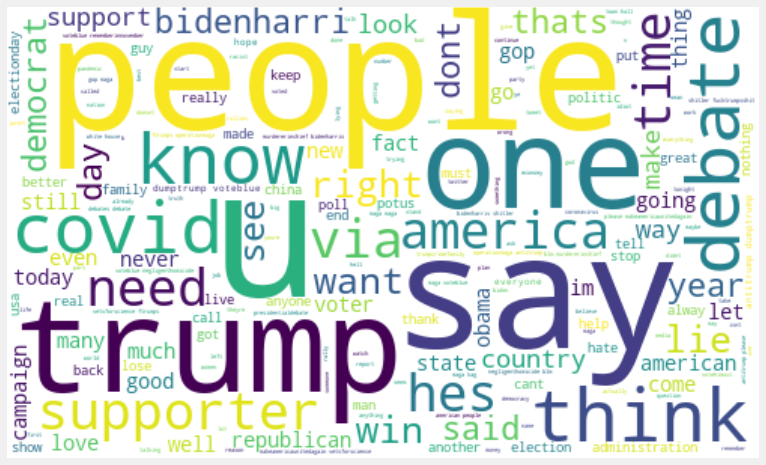

In [62]:
plotWordCloud(df_trump)

### #JoeBiden WordCloud

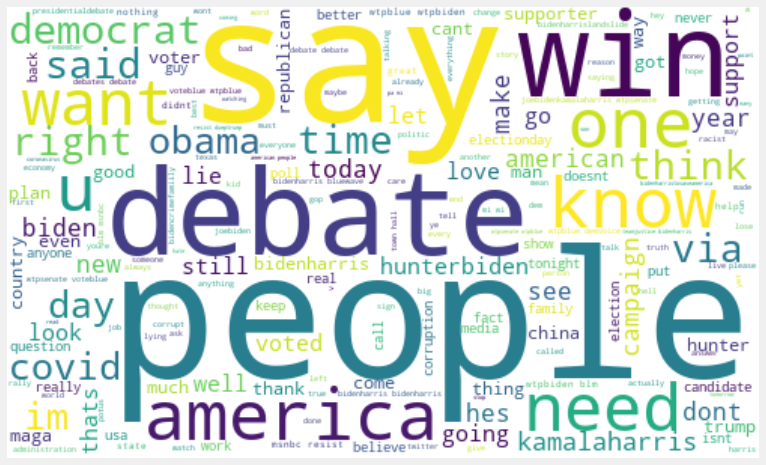

In [63]:
plotWordCloud(df_biden)

For Trump Tweets, the percentage of Tweets that are positive:35.7, negative: 25.4, neutral: 38.9 



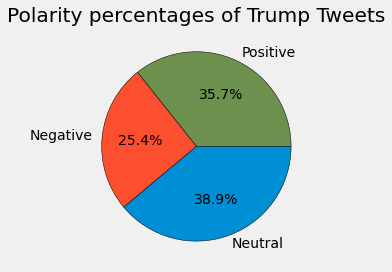

For Biden Tweets, the percentage of Tweets that are positive:39.0, negative: 21.5, neutral: 39.5 



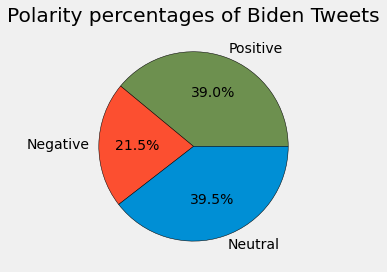

In [64]:
getPolarityPercentage(df_trump, "Trump")
getPolarityPercentage(df_biden, "Biden")

## Objective 2 - Analysing Relationships Between Sentiment Analysis and Voting Patterns

### Comparison of Twitter data and voting data for Donald Trump

&emsp;The first result we are going to look at is the scatterplot of 'Polarity of Tweets About Donald Trump' against 'Percentage of Votes Won' and the corresponding Pearson's R correlation.

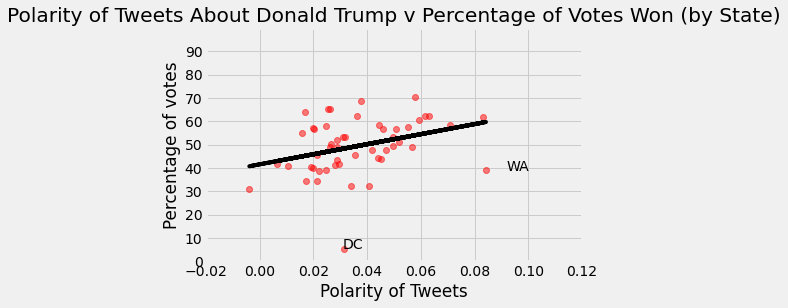

(0.33475000145547185, 0.01634811223243697)


In [65]:
scatterplot_correlation(x = trump_data['Polarity'],
                        y = trump_data['trump_pct'],
                        lm = trump_model,
                        col = 'red',
                        title = 'Donald Trump',
                        outliers = [(0.031,5.4),(0.092,39)],
                        outlier_labels = ['DC','WA'])

&emsp;We can see from the results of the Pearson's R test that there is a significant moderate correlation between the average polarity of Tweets about Donald Trump in each state and the percentage of votes he won in each state in the 2020 presidential election ( _r = 0.3377, p = 0.0154_ ). The scatterplot highlights two data points that appear to be outliers, Washington (WA) and the District of Columbia (DC). The vote-split in DC was very one-sided with Joe Biden receiving 93% of the vote. This could be due to the fact that Biden supports the district's bid for statehood whereas Trump does not. The polarity of Tweets about Donald Trump in Washington is much higher than we would expect to see given the percentage of votes he received in the state. This could be due to recent tensions in the state after it has become a focal point of antiracism protests across the country. Because of this, we might be seeing more residents feeling the need to share their views on Twitter, especially with Trump himself threatening to send in the military.

&emsp;Next let's have a look at the bar chart showing 'Polarity of Tweets About Donald Trump in Republican States' and 'Polarity of Tweets About Donald Trump in Democratic States' and the results of the t-test.

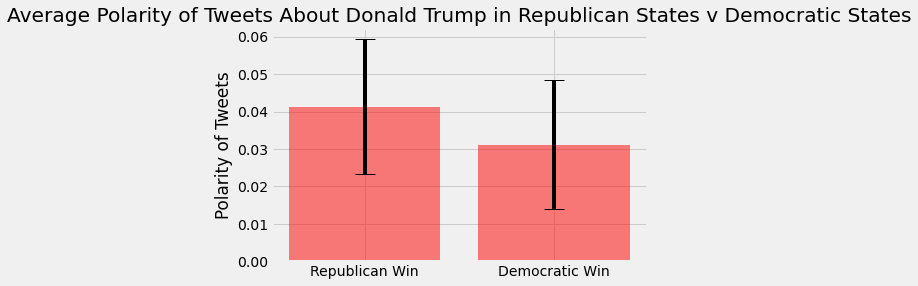

In [66]:
plot_bar_chart(categories = ['Republican Win','Democratic Win'],
               CTEs = trump_polarity_average,
               error = trump_polarity_sd,
               col = 'red',
               title = 'Average Polarity of Tweets About Donald Trump in Republican States v Democratic States')

In [67]:
ttest_and_shapiro(trump_polarity_winner, trump_polarity_loser)

(ShapiroResult(statistic=0.9489215612411499, pvalue=0.23704791069030762),
 ShapiroResult(statistic=0.950083315372467, pvalue=0.23294135928153992),
 Ttest_indResult(statistic=2.0196089746057853, pvalue=0.04891055972664955))

&emsp;The Shapiro-Wilk tests showed that the average State-Polarities in Democratic states were approximately normally distributed ( _p = 0.249 > 0.05_ ), however they weren't in Republican states ( _p = 0.015 < 0.05_ ) so therefore we must use a nonparametric test to compare the two groups. We will use a Mann-Whitney U test. From the results of the Mann-Whitney U test we can see that the average polarity of Tweets about Donald Trump in Republican states is significantly higher than in Democratic states ( _p = 0.049_ ). We would expect to see this but it could be exaggerated by the fact that Trump is an avid Twitter user. 

### Comparison of Twitter data and voting data for Joe Biden

&emsp;Again, we will first look at the scatterplot of 'Polarity of Tweets About Joe Biden' against 'Percentage of Votes Won' and the corresponding Pearson's R correlation.

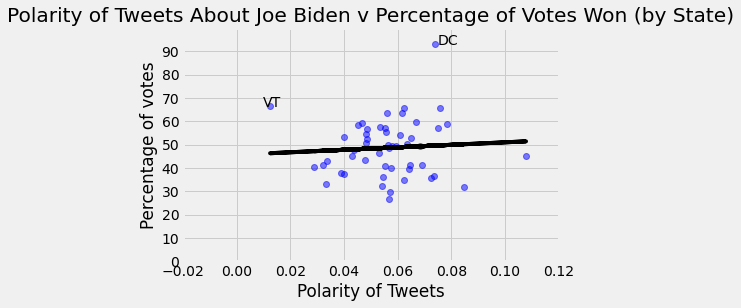

(0.06957079630802104, 0.6276009912152396)


In [68]:
scatterplot_correlation(x = biden_data['Polarity'],
                        y = biden_data['biden_pct'],
                        lm = biden_model,
                        col = 'blue',
                        title = 'Joe Biden',
                        outliers = [(0.075,93),(0.01,66.4)],
                        outlier_labels = ['DC','VT'])

&emsp;We can see that there is not a significant correlation between the average polarity of Tweets about Joe Biden in each state and the percentage of votes he received ( _p = 0.766_ ). The scatterplot for the correlation again showed two outliers, the District of Columbia (DC, which we discussed above) and Vermont (VT). Bernie Sanders is a senator from Vermont who was seen as the main alternative to Biden in the Democratic primary elections, a lot of his supporters have openly opposed Biden which could explain the low polarity of Tweets in the state but many have said they will still vote against Trump.

&emsp;As before, we will now look at the bar chart of 'Polarity of Tweets About Joe Biden in Democratic States' and 'Polarity of Tweets About Joe Biden in Republican States' and the corresponding t-test.

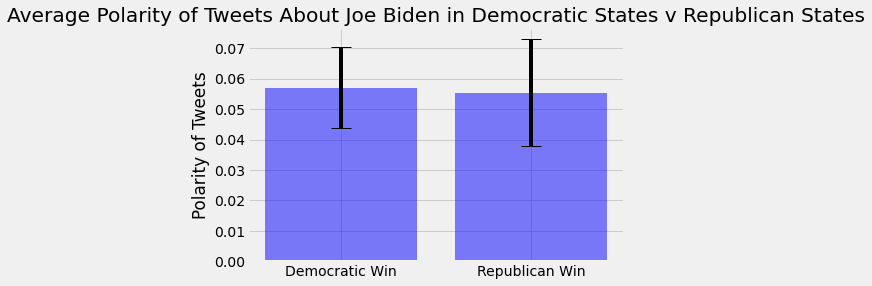

In [69]:
plot_bar_chart(categories = ['Democratic Win','Republican Win'],
               CTEs = biden_polarity_average,
               error = biden_polarity_sd,
               col = 'blue',
               title = 'Average Polarity of Tweets About Joe Biden in Democratic States v Republican States')

In [70]:
ttest_and_shapiro(biden_polarity_winner, biden_polarity_loser)

(ShapiroResult(statistic=0.9145036339759827, pvalue=0.03347846120595932),
 ShapiroResult(statistic=0.936660885810852, pvalue=0.12391609698534012),
 MannwhitneyuResult(statistic=276.0, pvalue=0.18039833494272955))

&emsp;The Shapiro-Wilk tests showed that the average State-Polarities in Republican states were approximately normally distributed ( _p = 0.463 > 0.05_ ), however they weren't in Republican states ( _p = 0.032 < 0.05_ ) so therefore we must use a nonparametric test to compare the two groups. We will use a Mann-Whitney U test. From the results of the Mann-Whitney U test we can see that there is not a significant difference between the average polarity of Tweets in Democratic states and in Republican states ( _p = 0.223_ ). This helps to explain the lack of a significant correlation from the Pearson's R test. One potential reason for this could be because of the demographic data of Twitter users. According to Pew Research Centre, Twitter users in the US are more likely to be Democrats than the general population which would go some way to explaining why the average polarity of Tweets about Joe Biden was not significantly different in states where he was elected and states where he wasn't. <br>
&emsp;Another possible explanation about why the polarity of the Tweets was higher in Republican states than we would have expected is the location of Twitter users. The usage of Twitter increases greatly in major cities, mostly due to the increased population, and even in Republican states many counties containing major cities voted to elect Biden e.g. Nashville, TN, New Orleans, LA and Indianapolis, IN.

## Objective 3 - Creating Choropleth Maps of Twitter and Voting Data
### Explanation of Results
#### _Vote share_
The first two maps, showing percentage vote share for each of the two main candidates (Donald Trump and Joe Biden) in the US election, are almost exactly the same. This is what we would expect as, in general, states in which Trump had a low vote share would have a high vote share for Biden. However, there is some information to be gained from comparing the two maps, as the difference in shade between the two shows the level of impact made on the result of candidates from smaller parties (such as the Greens or Libertarians). For exmaple, Nevada is visibly blue on the first map, showing that Donald Trump received considerably less than 50% of the vote; however, the state is not blue on the Biden map as Biden took marginally above 50% of the vote, with smaller parties making up the remainder.

The ```seismic``` colour map was chosen for these two maps, as the diverging red and blue colours nicely map the Republican and Democrat states. The colour map was reversed for the second map, in order to avoid confusion, as red is inherently associated with the Republican party on maps such as these, with blue associated with Democrats.

#### _Polarity and subjectivity_
The following figures show comparative maps, highlighting the difference in Twitter sentiment between the two candidates. By comparing polarity, we can see instantly that sentiment in Tweets containing #DonaldTrump were on average more negative than those containing #JoeBiden. There are some outlying states, such as Vermont, which was mentioned earlier as having particularly low polarity scores for both candidates. Ohio also stands out due to its positive polarity scores for #JoeBiden. This would not be expected, as the state ultimately voted Republican. This suggests that Twitter sentiment in Ohio is particularly bad at predicting election results.

The subjectivity maps do show some stark results (ie. Utah scores particularly low). However, it is difficult to conclude anything from this map to help us in our objectives, as we cannot tell whether subjectivity and objectivity are linked to positive or negative polarity from this visualisation alone.

For these maps, the ```plasma``` colour map was chosen, as there was not a clear diverging point for the sentiment scores as there was in vote share. Rather than use different shades of the same colour, which can prove difficult to tell apart, a _perceptually uniform sequential_ colour map was chosen.

### Visualisation

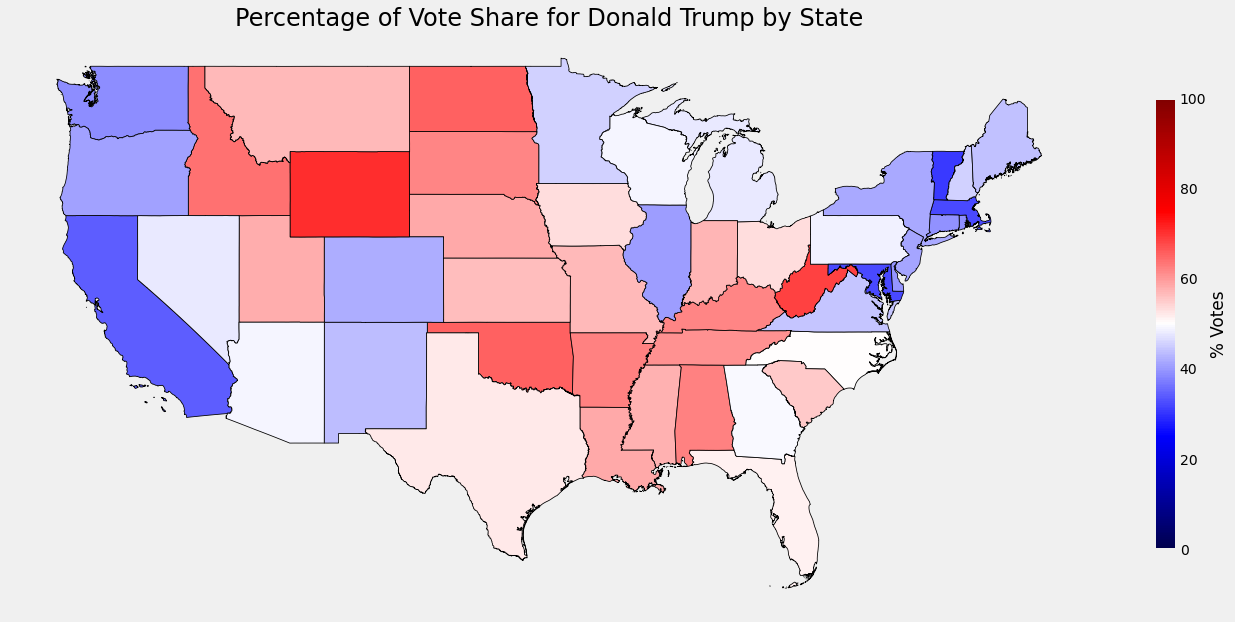

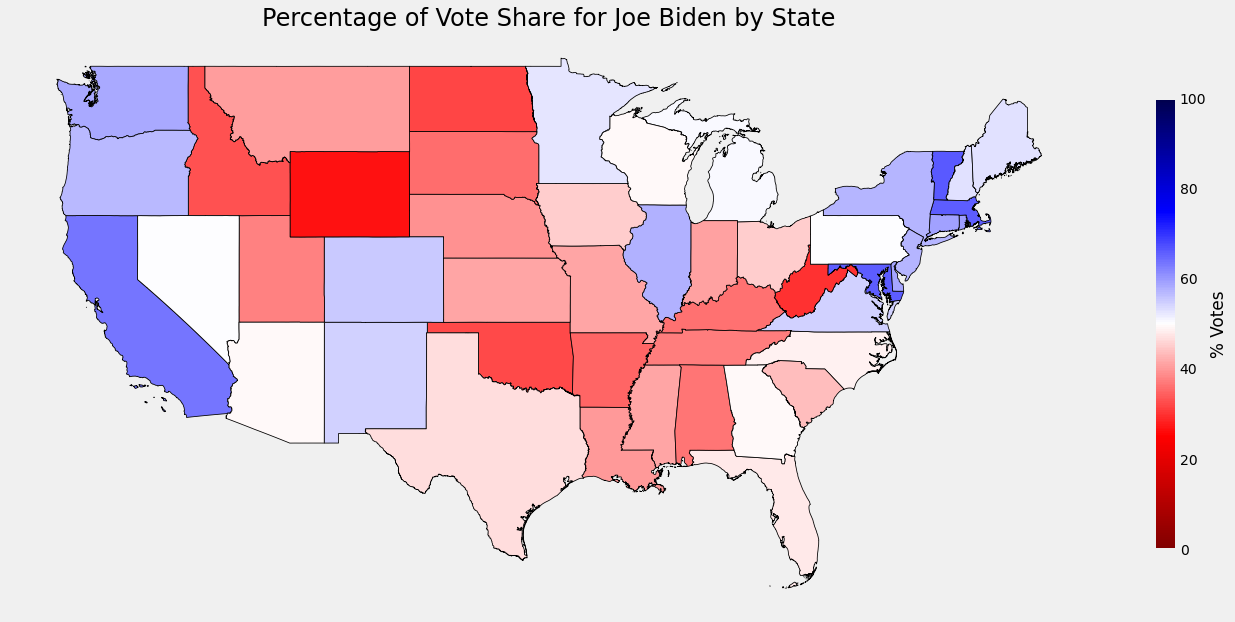

In [71]:
create_map('trump_pct', 'seismic', 'Percentage of Vote Share for Donald Trump by State', '% Votes', 0, 100)
create_map('biden_pct', 'seismic_r', 'Percentage of Vote Share for Joe Biden by State', '% Votes', 0, 100)

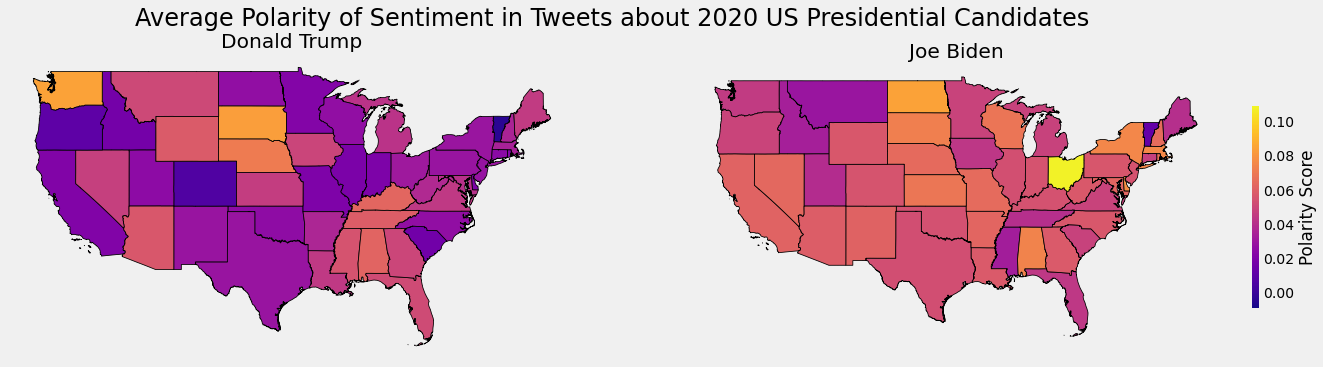

In [72]:
comparative_map('Polarity_Trump', 'Polarity_Biden', 'plasma', 'Average Polarity of Sentiment in Tweets about 2020 US Presidential Candidates', 'Polarity Score', -0.01, 0.11)

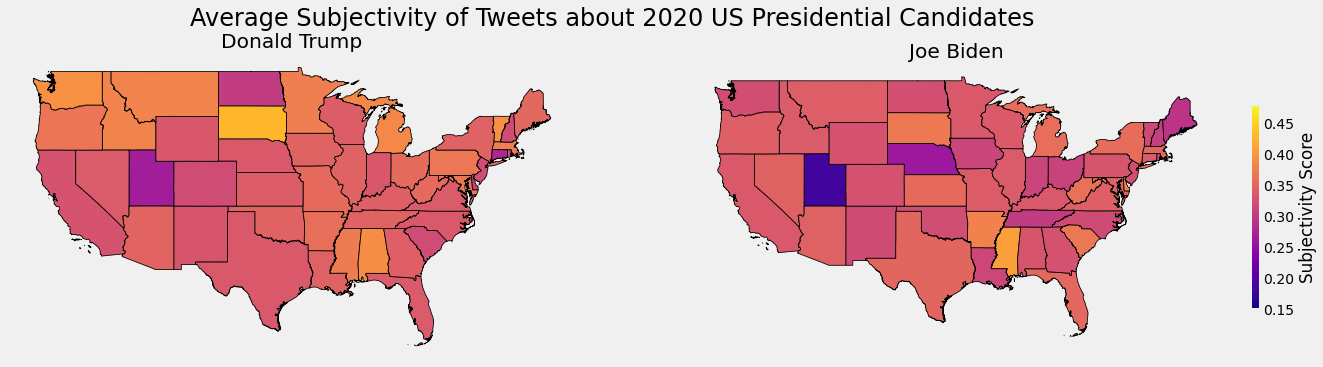

In [73]:
comparative_map('Subjectivity_Trump', 'Subjectivity_Biden', 'plasma', 'Average Subjectivity of Tweets about 2020 US Presidential Candidates', 'Subjectivity Score', 0.15, 0.48)

# Conclusion (5 marks)
### Acheivements
&emsp;As we expected the polarity of tweets was fairly evenly distributed between positive, negative and neutral for both Donald Trump and Joe Biden. We also saw that the polarity of tweets about Donald Trump by state was significantly moderately correlated to voting percentages for him and that the polarity was significantly higher on average in the states that he won. However, the same wasn't true for Joe Biden which was unexpected. This could be due to some of the limitations of our study or it could be that he doesn't provoke an extreme reaction one way or another on social media. 

 

### Limitations

 

&emsp;One of the main limitations of this research project was the potential for bias in the Twitter data. Twitter users are on average younger and more likely to vote Democrat than the general U.S. population which means that the tweets we analysed might not be representative of public opinion. Another limitation of the project is that we could only run the sentiment analysis on tweets written in English, which means we aren't capturing the opinions of anyone who tweets in a different language. Our analysis also can't take account of sarcasm and irony when detecting sentiment, this is heavily used on Twitter, especially when expressing strong positive or negative opinions and could skew the sentiment analysis.

&emsp;There were also limitations in the spatial visualisation, in that there is no easy way to superimpose Hawaii and Alaska onto a map of the lower-48, which would have provided us with the full election results. Smaller states/areas, such as Rhode Island and Washington, D.C., are also difficult to interpret in the map plot due to their size; however, pairing these plots with statistical analyses as in this report helps to mitigate this.

 

### Future Work

 

&emsp;In future work it would be really interesting to analyse the tweets written in different languages, to see if they affect the outcomes of the analysis. Approximately 13% of the U.S. speak Spanish as their native language which could drastically change the sentiment of tweets in many states. It would also be interesting to break the data down even further and look at county level instead of at state level. This could show whether there is a difference between major cities and lesser populated areas.

# Grading

_Feedback and marks will be given here._

### Feedback

### Marks

In [ ]:
DATA   = 10
AIMS   =  5
DESIGN = 5

CODE = 15

OUTCOME_EXPLANATION   = 10
OUTCOME_VISUALISATION = 10

CONCLUSION = 5

TOTAL = ( DATA + AIMS + DESIGN + CODE 
          + OUTCOME_VISUALISATION + OUTCOME_VISUALISATION
          + CONCLUSION )
TOTAL